# Loan Application Status Prediction
# Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 


# Importing Libraries 

In [93]:
!pip install -U imbalanced-learn

In [94]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_roc_curve 

In [95]:
df = pd.read_csv("loan_prediction.csv")

In [96]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Here we can see The dataset contains the details of Applicants who have applied for loan.

* This dataset is comprised of 614 rows and 13 columns including one target varibale i.e. 'Loan_Status'. where we need to predict whether the loan of the applicant will be approved or not.
* There are two unique values in the target column Y (yes) and N (no).
* The target variable that is 'Loan_Status' has two classes, hence this is a classification data problem. We will look more into the dataset in the EDA part

In [97]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [98]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [99]:
print(f"The rows and columns in the dataset:{df.shape}")
print(f"\n The column headers in the dataset:{df.columns}")

The rows and columns in the dataset:(614, 13)

 The column headers in the dataset:Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [101]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


# Checking the Null Values

In [103]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [104]:
round((df.isnull().sum()/df.shape[0])*100,2)

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

<AxesSubplot:>

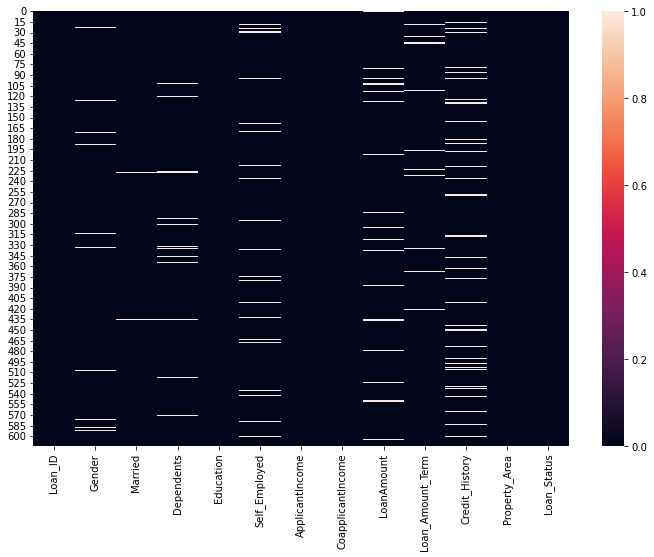

In [105]:
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull())

In [109]:
for i in df.columns[1:]:
    print(i,'have unique values =',df[i].unique(),'\n')

Gender have unique values = ['Male' 'Female' nan] 

Married have unique values = ['No' 'Yes' nan] 

Dependents have unique values = ['0' '1' '2' '3+' nan] 

Education have unique values = ['Graduate' 'Not Graduate'] 

Self_Employed have unique values = ['No' 'Yes' nan] 

ApplicantIncome have unique values = [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 105

In [110]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [111]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [112]:
for i in df:
    percentage = np.round((df[i].isnull().sum()/614)*100,2)
    print(i,':',percentage,'%')

Loan_ID : 0.0 %
Gender : 2.12 %
Married : 0.49 %
Dependents : 2.44 %
Education : 0.0 %
Self_Employed : 5.21 %
ApplicantIncome : 0.0 %
CoapplicantIncome : 0.0 %
LoanAmount : 3.58 %
Loan_Amount_Term : 2.28 %
Credit_History : 8.14 %
Property_Area : 0.0 %
Loan_Status : 0.0 %


Above informaions is indicates the percentage of null values present in each column;

* Column 'Credit_History' has most no. of null values (i.e. 8.14%) followed by columns 'Self_Employed' (5.21%), 'LoanAmount'(3.58%) and 'Loan_Amount_Term' (2.28 %)
* Columns: 'Loan_ID', 'Education', 'ApplicantIncome', 'CoapplicantIncome', 'Property_Area' & 'Loan_Status' have no null values.

In [113]:
# Checking duplicate values 
df.duplicated().sum()

0

There are no duplicate values in the data.

In [114]:
# Checking the number of unique values in each columns:
df.nunique().to_frame('Number of Unique Values')

,Number of Unique Values
Loan_ID,614
Gender,2
Married,2
Dependents,4
Education,2
Self_Employed,2
ApplicantIncome,505
CoapplicantIncome,287
LoanAmount,203
Loan_Amount_Term,10


In [115]:
#Checking the value counts of each of the columns
for i in df.columns:
    print(f""" Column '{i}' :
{df[i].value_counts()}
___________________________________""")

 Column 'Loan_ID' :
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: Loan_ID, Length: 614, dtype: int64
___________________________________
 Column 'Gender' :
Male      489
Female    112
Name: Gender, dtype: int64
___________________________________
 Column 'Married' :
Yes    398
No     213
Name: Married, dtype: int64
___________________________________
 Column 'Dependents' :
0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
___________________________________
 Column 'Education' :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
___________________________________
 Column 'Self_Employed' :
No     500
Yes     82
Name: Self_Employed, dtype: int64
___________________________________
 Column 'ApplicantIncome' :
2500    9
4583    6
6000    6
2600    6
3333    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: ApplicantInco

Above tabes showes us, the value counts of each unique value in each table:

* Column 'Loan_ID' has all unique value and that is obvious because its the loan id no., so we need to drop this column as it has no use in our prediction.
* Column 'Gender' has more count of 'Male' so we should fill nan values with male (categorical column).
* The same logic will be applicable for columns: 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History' because these are categorical columns.
* From above we can say that the data is imbalanced, so will balance the data before model building.

In [116]:
# Data preprocessing 

In [117]:
df.drop('Loan_ID',axis=1,inplace=True)

In [118]:
# Filling Null values with maximum count because these are categorical columns.

df['Gender'] = df['Gender'].fillna('Male')
df['Married'] = df['Married'].fillna('Yes')
df['Dependents']= df['Dependents'].fillna('0')
df['Self_Employed'] = df['Self_Employed'].fillna('No')
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(360)
df['Credit_History']= df['Credit_History'].fillna(1)

In [119]:
# Filling Null values for Numerical columns:

df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [120]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

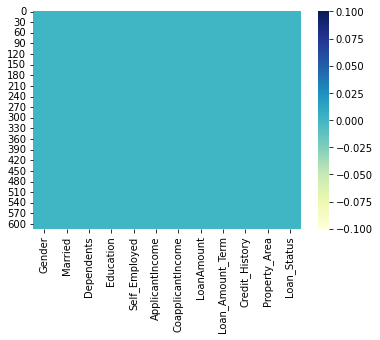

In [121]:
sns.heatmap(df.isnull(),cmap="YlGnBu")

We can see that we have sucessfully removed the Nan values from our dataset.

In [122]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


# Checking "Categorical and Numerical columns:"

In [123]:

categorical_col=[]
numerical_col=[]

for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
    else:
        numerical_col.append(i)
        
print(f"""** Categorical Columns: {categorical_col}

-----------------------------------------------------------------------------------------------------------------------

** Numerical Columns: {numerical_col}""")

** Categorical Columns: ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

-----------------------------------------------------------------------------------------------------------------------

** Numerical Columns: ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


# Data Visualization 

In [124]:
# Categorical columns 

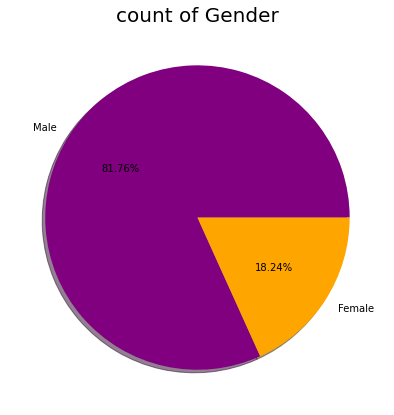

In [125]:
# 1. Visualize the count of gender of the people
labels='Male','Female'
fig, ax = plt.subplots(figsize=(7,7))
colors = ["purple","orange"]
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title('count of Gender',fontsize=20)
plt.show()

The count of Male is high and has around 81% and only 18.24% of females are there.

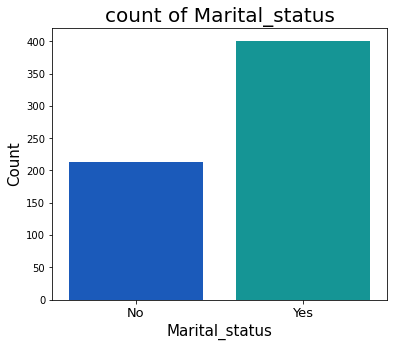

In [126]:
# 2. Visualizing the Marital_status
plt.figure(figsize=(6,5))
sns.countplot(df['Married'],palette = 'winter')

plt.title('count of Marital_status',fontsize=20)
plt.xlabel('Marital_status',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

Here we can see that the population of married people are higher.

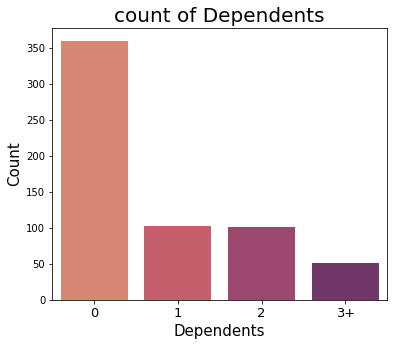

In [127]:
# 3. Visualizing the count Dependents
plt.figure(figsize=(6,5))
sns.countplot(df['Dependents'],palette = 'flare')

plt.title('count of Dependents',fontsize=20)
plt.xlabel('Dependents',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

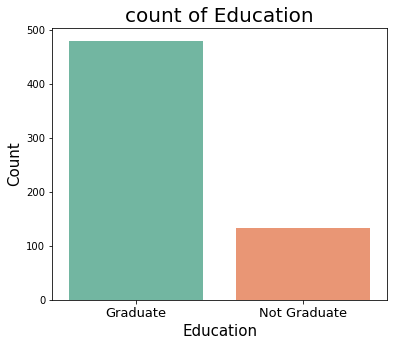

In [128]:
# 4. Visualizing the Education
plt.figure(figsize=(6,5))
sns.countplot(df['Education'],palette = 'Set2')

plt.title('count of Education',fontsize=20)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

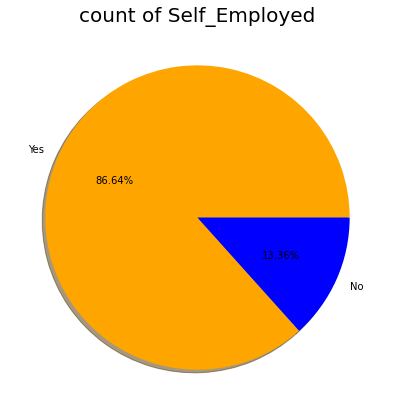

In [129]:
# 5. Visualize the count of gender of the people
labels='Yes','No'
fig, ax = plt.subplots(figsize=(7,7))
colors = ["orange","blue"]
ax.pie(df['Self_Employed'].value_counts(), labels=labels, autopct='%1.2f%%', shadow=True,colors=colors)
plt.title('count of Self_Employed',fontsize=20)
plt.show()

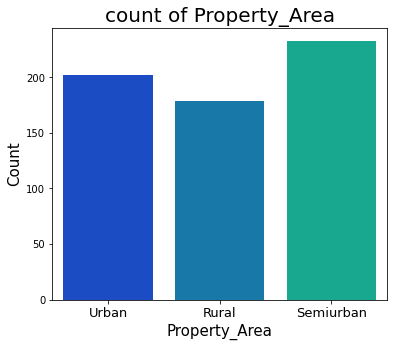

In [130]:
# 6. Visualizing the Property_Area
plt.figure(figsize=(6,5))
sns.countplot(df['Property_Area'],palette = 'winter')

plt.title('count of Property_Area',fontsize=20)
plt.xlabel('Property_Area',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=13) #,rotation=30)

plt.show()

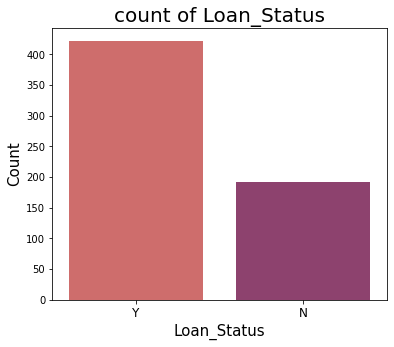

In [131]:
#Visualize the whether the Loan_Status is Yes or No
plt.figure(figsize=(6,5))
sns.countplot(df["Loan_Status"],palette = 'flare')

plt.title('count of Loan_Status',fontsize=20)
plt.xlabel('Loan_Status',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

We see that there are 2 classes in target variable, and the dataset is imbalanced. We will have to balance the datset for modelling.

In [132]:
# Numerical columns :

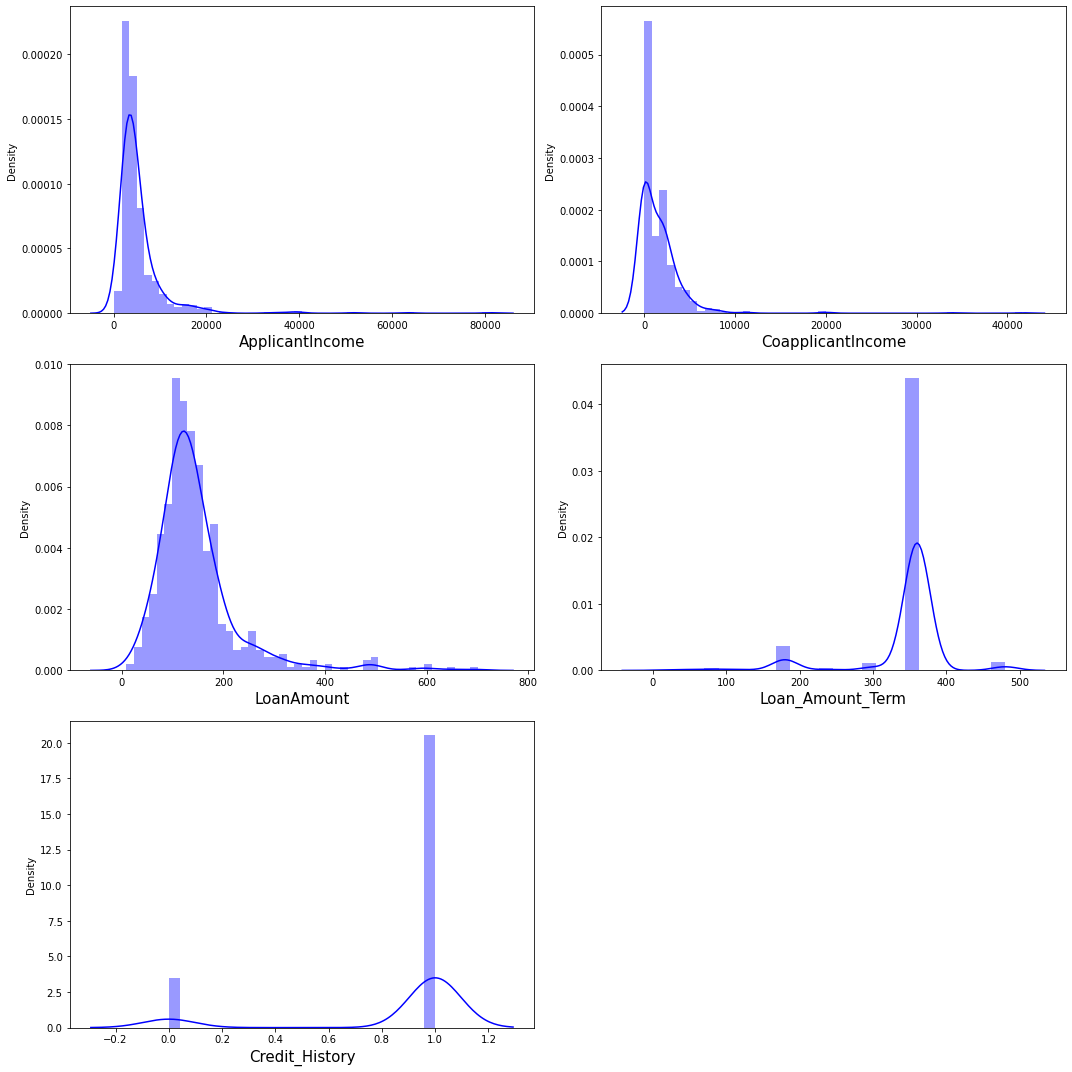

In [133]:
# Checking how the data is distributed:

plt.figure(figsize=(15,15), facecolor='white')
plotnumber=1
for columns in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.distplot(df[columns], color='b')
        plt.xlabel(columns, fontsize=15)
    plotnumber+=1
plt.tight_layout()

# Bivariate Analysis 

In [134]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

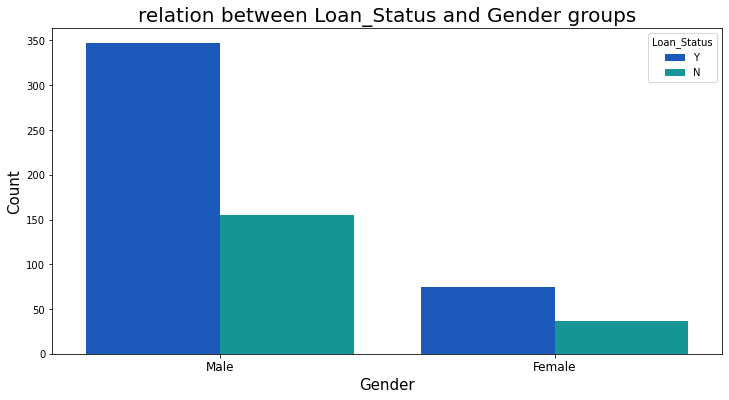

In [135]:
# Visualizing the relation between Loan_Status and Gender groups

plt.figure(figsize = (12,6))
sns.countplot(x = 'Gender' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'winter')

plt.title('relation between Loan_Status and Gender groups',fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

From above we can observe that Males are getting more Loans as compared to womens.

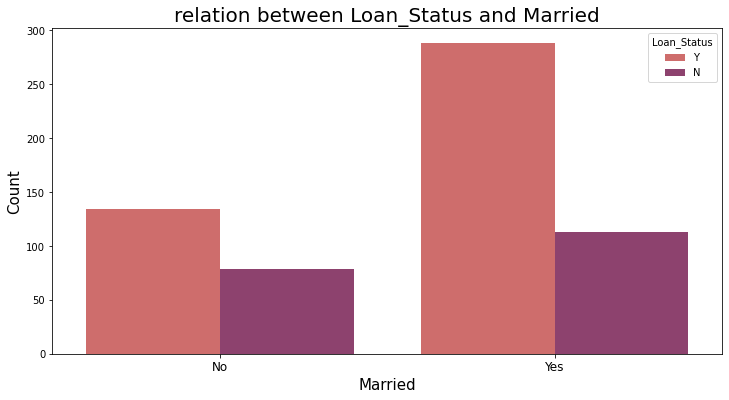

In [136]:
# Visualizing the relation between Loan_Status and Married
plt.figure(figsize = (12,6))
sns.countplot(x = 'Married' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'flare')

plt.title('relation between Loan_Status and Married',fontsize=20)
plt.xlabel('Married',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

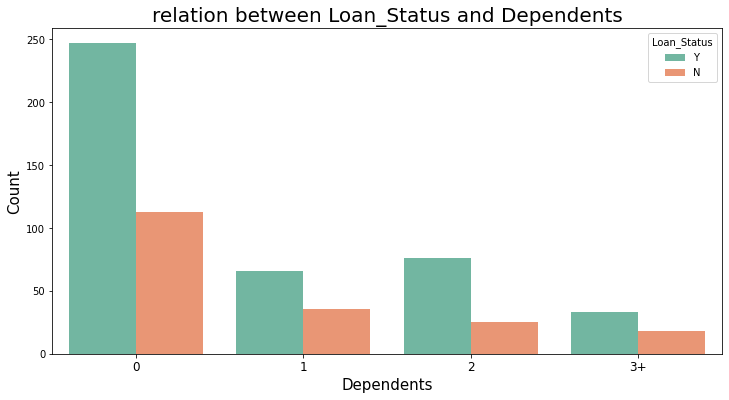

In [137]:
# Visualizing the relation between Loan_Status and Dependents

plt.figure(figsize = (12,6))
sns.countplot(x = 'Dependents' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'Set2')

plt.title('relation between Loan_Status and Dependents',fontsize=20)
plt.xlabel('Dependents',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

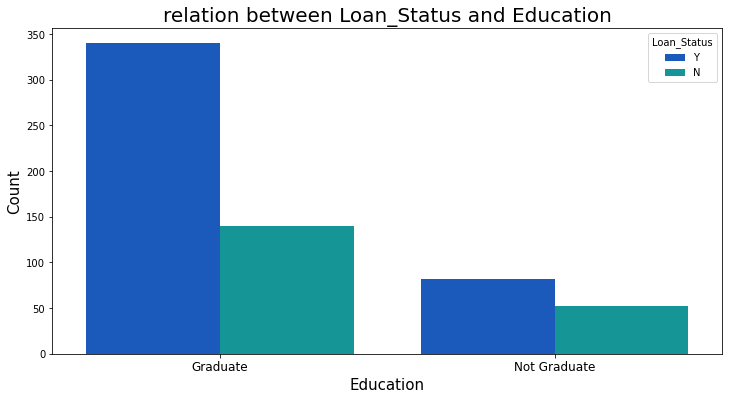

In [138]:
# Visualizing the relation between Loan_Status and Education

plt.figure(figsize = (12,6))
sns.countplot(x = 'Education' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'winter')

plt.title('relation between Loan_Status and Education',fontsize=20)
plt.xlabel('Education',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

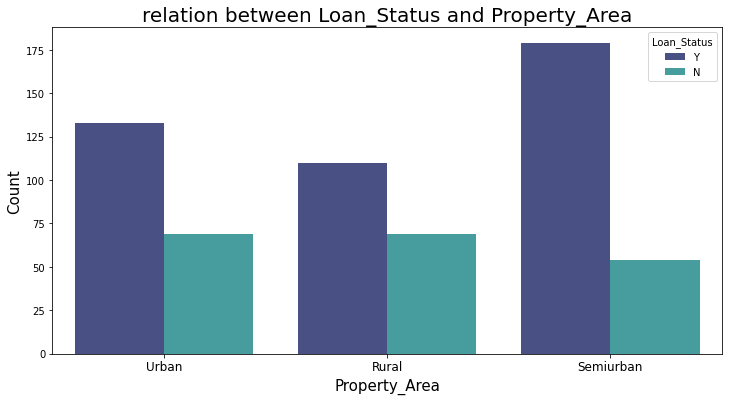

In [139]:
# Visualizing the relation between Loan_Status and Property_Area

plt.figure(figsize = (12,6))
sns.countplot(x = 'Property_Area' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'mako')

plt.title('relation between Loan_Status and Property_Area',fontsize=20)
plt.xlabel('Property_Area',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()


* We can see application approval rate is higest in SemiUrban Areas
* Getting Loan according to Property_Area are in this way Semiurban > Urban > Rural.

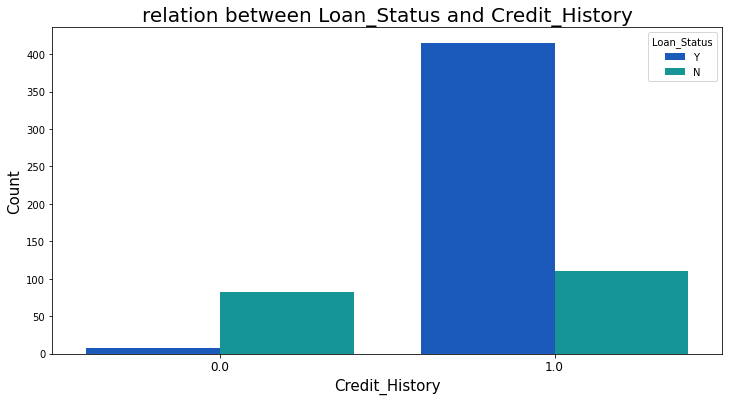

In [140]:
# Visualizing the relation between Loan_Status and Credit_History

plt.figure(figsize = (12,6))
sns.countplot(x = 'Credit_History' , hue = 'Loan_Status' , data = df , dodge = True , palette = 'winter')

plt.title('relation between Loan_Status and Credit_History',fontsize=20)
plt.xlabel('Credit_History',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.xticks(fontsize=12) #,rotation=30)

plt.show()

In [141]:
# Checking the Outliers :

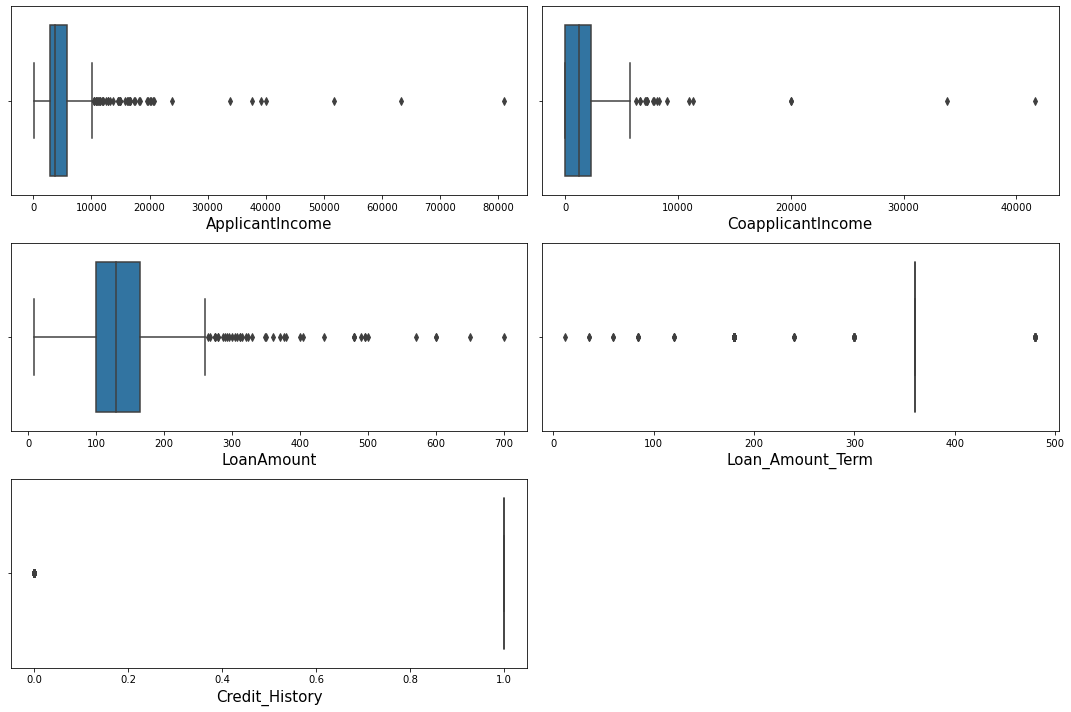

In [142]:
# Identifying the outliers using boxplot for numerical columns:

plt.figure(figsize=(15,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(3,2,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()


The outliers present in all the columns we will remove it using Zscore method.

# Removing outliers : 

# ZSCORE method :

In [143]:
numerical_col

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [144]:
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']]
z=np.abs(zscore(features))

z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.000000,0.273231,0.411733
1,0.134412,0.038732,0.219273,0.273231,0.411733
2,0.393747,0.554487,0.957641,0.273231,0.411733
3,0.462062,0.251980,0.314547,0.273231,0.411733
4,0.097728,0.554487,0.064454,0.273231,0.411733
...,...,...,...,...,...
609,0.410130,0.554487,0.898095,0.273231,0.411733
610,0.212557,0.554487,1.267279,2.522836,0.411733
611,0.437174,0.472404,1.269371,0.273231,0.411733
612,0.357064,0.554487,0.483367,0.273231,0.411733


In [145]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


* So here we can see the new dataframe after removing the outliers. Here we have removed the outliers whose zscore is less than 3.

In [146]:
df.shape

(614, 12)

In [147]:
new_df.shape

(577, 12)

In [148]:
# Checking the data loss
data_loss =(614-577)/614*100
print(f"""data_loss : {data_loss}%""")

data_loss : 6.026058631921824%


# IQR Method ( Inter Quantile range)

In [149]:
Q1 = features.quantile(0.25)

Q3 = features.quantile(0.75)

#IQR
IQR = Q3-Q1

df1= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [150]:
df1.shape

(396, 12)

In [151]:
# Checking the data loss 
data_loss = (614-396)/614*100
print(f"""data_loss : {data_loss}%""")

data_loss : 35.50488599348534%


We can observe here that using IQR method we are losing 35.5 % of data which is huge. so considering zscore method for better result.

# Encoding the categorical columns using LAbel Encoder

In [152]:
new_df['Loan_Status']

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 577, dtype: object

In [153]:
categorical_col

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [154]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
new_df[categorical_col]= new_df[categorical_col].apply(LE.fit_transform)

In [155]:
new_df[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


# Checking Coreelation:

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5]),
 [Text(0.5, 0, 'Gender'),
  Text(1.5, 0, 'Married'),
  Text(2.5, 0, 'Dependents'),
  Text(3.5, 0, 'Education'),
  Text(4.5, 0, 'Self_Employed'),
  Text(5.5, 0, 'ApplicantIncome'),
  Text(6.5, 0, 'CoapplicantIncome'),
  Text(7.5, 0, 'LoanAmount'),
  Text(8.5, 0, 'Loan_Amount_Term'),
  Text(9.5, 0, 'Credit_History'),
  Text(10.5, 0, 'Property_Area'),
  Text(11.5, 0, 'Loan_Status')])

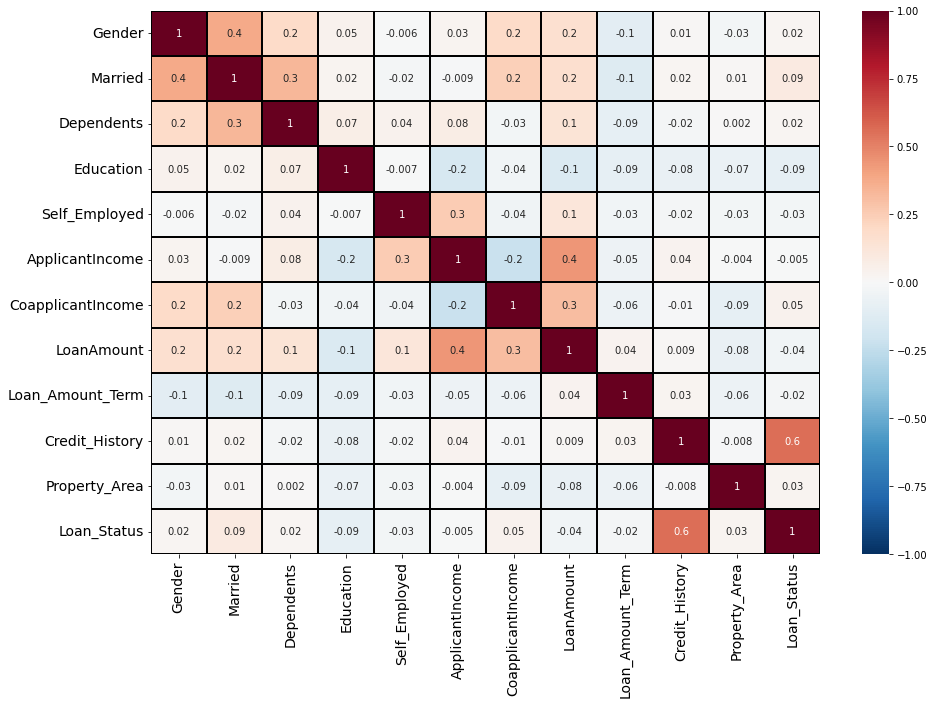

In [156]:
corr=new_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(new_df.corr(),linewidths=.1,vmin=-1, vmax=1, fmt='.1g', annot = True, linecolor="black",annot_kws={'size':10},cmap="RdBu_r")
plt.yticks(rotation=0,fontsize = 14)
plt.xticks(fontsize = 14)

It is visible from the heatmap and the table, that the relation of features vs target and features vs features. Also the positive and negative relationship can be seen.

* Here we can see string Positive correlation exists between applicants income and load amount.
* Also our target column is highly postively correlated with Credit history.

# Seperating the features and target 

In [157]:
x = new_df.drop('Loan_Status',axis=1)
y = new_df['Loan_Status']

# Checking Skewness of the dataset 

In [158]:
x.skew().sort_values()

Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Gender              -1.622920
Married             -0.630211
Property_Area       -0.055332
Dependents           1.052106
LoanAmount           1.113132
Education            1.306588
CoapplicantIncome    1.350517
ApplicantIncome      2.148522
Self_Employed        2.252848
dtype: float64

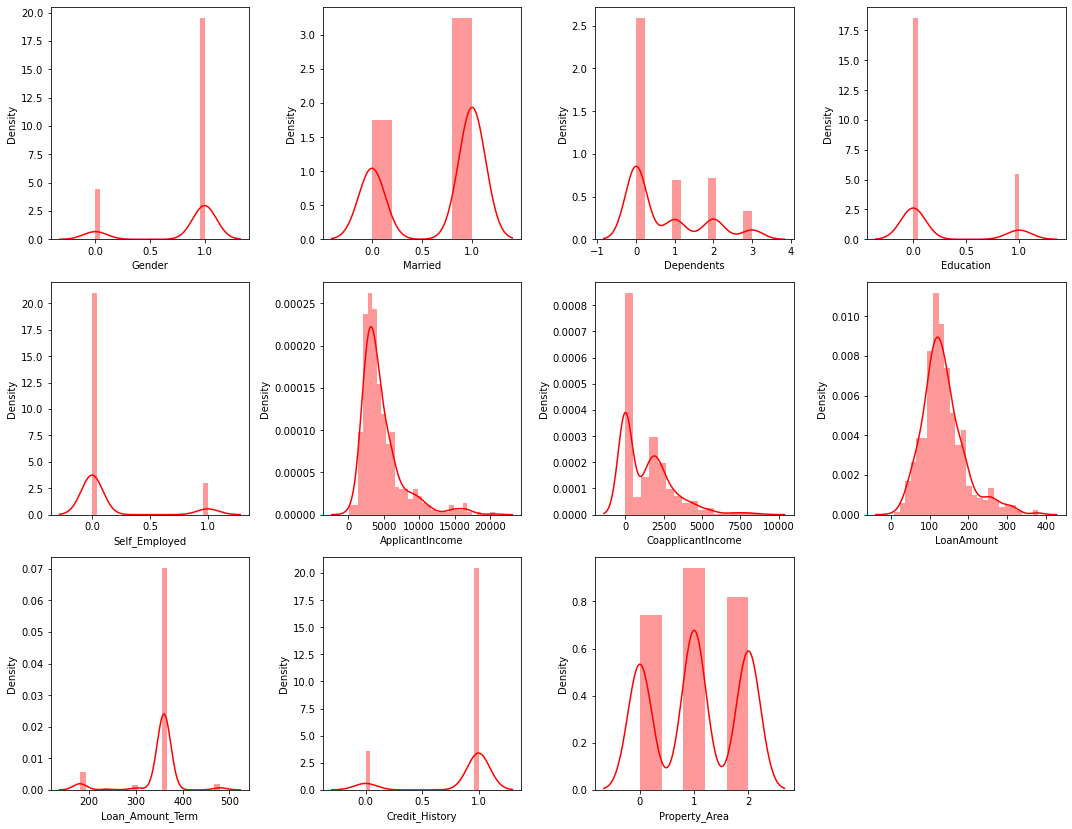

In [159]:
plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(x[column],color = 'r')
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

* We can clearly identify that the data in the dataset is not normal. and have skewness in data.

# Removing Skewness

In [160]:
from sklearn.preprocessing import power_transform

In [161]:
x_new = power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [162]:
x.skew().sort_values()

Credit_History      -1.976043
Gender              -1.622920
Married             -0.630211
CoapplicantIncome   -0.191876
Property_Area       -0.155094
ApplicantIncome      0.027981
LoanAmount           0.047692
Dependents           0.478360
Loan_Amount_Term     0.727533
Education            1.306588
Self_Employed        2.252848
dtype: float64

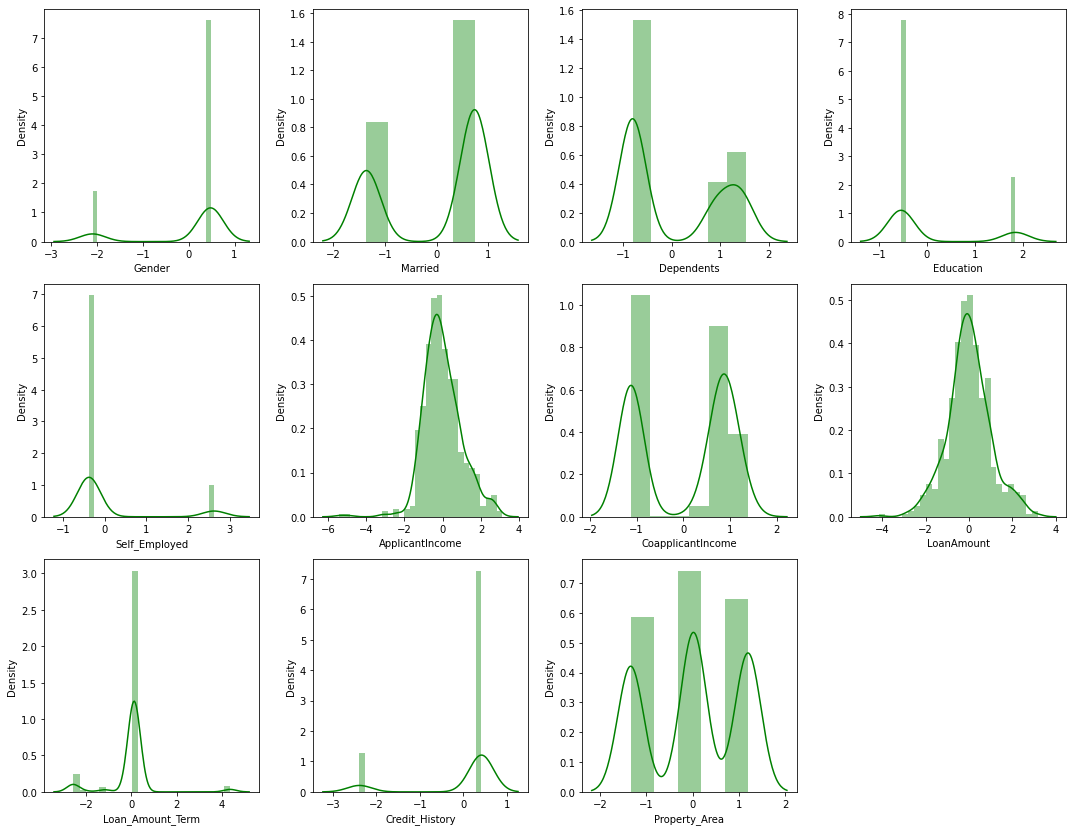

In [163]:
plt.figure(figsize = (15,15), facecolor = 'white')

plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(4,4, plotnumber)
        sns.distplot(x[column],color='g')
        plt.xlabel(column)
        
    plotnumber+=1
    
plt.tight_layout()

AS we can see here we have removd the skewness and the data looks normalized than before 

In [164]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.681780,-1.122446,0.316078,0.130788,0.418513,1.194806
1,0.477137,0.733939,0.902869,-0.541961,-0.380580,0.234783,0.744117,-0.015871,0.130788,0.418513,-1.340199
2,0.477137,0.733939,-0.809243,-0.541961,2.627567,-0.527201,-1.122446,-1.443112,0.130788,0.418513,1.194806
3,0.477137,0.733939,-0.809243,1.845150,-0.380580,-0.791972,0.895786,-0.169860,0.130788,0.418513,1.194806
4,0.477137,-1.362511,-0.809243,-0.541961,-0.380580,0.728848,-1.122446,0.221481,0.130788,0.418513,1.194806
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.809243,-0.541961,-0.380580,-0.587375,-1.122446,-1.301481,0.130788,0.418513,-1.340199
573,0.477137,0.733939,1.533596,-0.541961,-0.380580,0.035386,-1.122446,-2.321865,-2.562700,0.418513,-1.340199
574,0.477137,0.733939,0.902869,-0.541961,-0.380580,1.281658,0.173344,1.838099,0.130788,0.418513,1.194806
575,0.477137,0.733939,1.344671,-0.541961,-0.380580,1.164426,-1.122446,0.961555,0.130788,0.418513,1.194806


# Oversampling (SMOTE)

In [165]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [166]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

# Modelling

In [167]:
maxAccu=0
maxRS=0

for i in range(0,500):
    x_train,x_test, y_train, y_test=train_test_split(x,y,test_size=.28, random_state=i)
    rfc=RandomForestClassifier()
    rfc.fit(x_train,y_train)
    pred=rfc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9013452914798207  on Random_state  300


# Creating Train_test_split

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.28,random_state=maxRS)

# Logistics Regression

In [170]:
log = LogisticRegression()
log.fit(x_train,y_train)

# Prediction
predlog = log.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predlog)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predlog)}''')
print(classification_report(y_test,predlog))

Accuracy: 78.47533632286996%
Confusion Matrix:
[[ 74  41]
 [  7 101]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.76       115
           1       0.71      0.94      0.81       108

    accuracy                           0.78       223
   macro avg       0.81      0.79      0.78       223
weighted avg       0.82      0.78      0.78       223



# Decision Tree Classifier

In [171]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

# Prediction
preddtc = dtc.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, preddtc)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, preddtc)}''')
print(classification_report(y_test,preddtc))

Accuracy: 82.95964125560538%
Confusion Matrix:
[[99 16]
 [22 86]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84       115
           1       0.84      0.80      0.82       108

    accuracy                           0.83       223
   macro avg       0.83      0.83      0.83       223
weighted avg       0.83      0.83      0.83       223



# Random Forest Classifier

In [172]:
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)

# Prediction
predrfc=rfc.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predrfc)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predrfc)}''')
print(classification_report(y_test,predrfc))

Accuracy: 90.13452914798206%
Confusion Matrix:
[[101  14]
 [  8 100]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       115
           1       0.88      0.93      0.90       108

    accuracy                           0.90       223
   macro avg       0.90      0.90      0.90       223
weighted avg       0.90      0.90      0.90       223



# SGD

In [173]:
# Checking accuracy for SGD Classifier()
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)

# Prediction
predsgd = sgd.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predsgd)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predsgd)}''')
print(classification_report(y_test,predsgd))

Accuracy: 69.05829596412556%
Confusion Matrix:
[[81 34]
 [35 73]]
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       115
           1       0.68      0.68      0.68       108

    accuracy                           0.69       223
   macro avg       0.69      0.69      0.69       223
weighted avg       0.69      0.69      0.69       223



# Support Vector Classifier

In [174]:
# Checking accuracy for Support Vector Classifier (SVC)
svc=SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predsvc)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predsvc)}''')
print(classification_report(y_test,predsvc))

Accuracy: 82.51121076233184%
Confusion Matrix:
[[ 80  35]
 [  4 104]]
              precision    recall  f1-score   support

           0       0.95      0.70      0.80       115
           1       0.75      0.96      0.84       108

    accuracy                           0.83       223
   macro avg       0.85      0.83      0.82       223
weighted avg       0.85      0.83      0.82       223



# AdaBoost Classifier 

In [175]:
# Checking accuracy for AdaBoostClassifier()
adb=AdaBoostClassifier()
adb.fit(x_train,y_train)

# Prediction
predadb = adb.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predadb)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predadb)}''')
print(classification_report(y_test,predadb))

Accuracy: 80.26905829596413%
Confusion Matrix:
[[86 29]
 [15 93]]
              precision    recall  f1-score   support

           0       0.85      0.75      0.80       115
           1       0.76      0.86      0.81       108

    accuracy                           0.80       223
   macro avg       0.81      0.80      0.80       223
weighted avg       0.81      0.80      0.80       223



# Gradient Boosting Classifier

In [176]:
# Checking accuracy for Gradient Boosting Classifier.
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

# Prediction
predgbc = gbc.predict(x_test)

print(f"""Accuracy: {accuracy_score(y_test, predgbc)*100}%""")
print(f'''Confusion Matrix:
{confusion_matrix(y_test, predgbc)}''')
print(classification_report(y_test,predgbc))

Accuracy: 84.30493273542601%
Confusion Matrix:
[[ 87  28]
 [  7 101]]
              precision    recall  f1-score   support

           0       0.93      0.76      0.83       115
           1       0.78      0.94      0.85       108

    accuracy                           0.84       223
   macro avg       0.85      0.85      0.84       223
weighted avg       0.86      0.84      0.84       223



# Cross validation score

In [177]:
# CV score for Logistics Regression 
print(cross_val_score(log,x,y,cv=5).mean()*100,"%")

73.74764150943398 %


In [178]:
# CV Score for Decision tree 
print(cross_val_score(dtc,x,y,cv=5).mean()*100,"%")

76.14229559748428 %


In [179]:
# CV score for Random Forest Classifier 
print(cross_val_score(rfc,x,y,cv=5).mean()*100,"%")

84.68553459119497 %


In [180]:
# Cv score for SGD
print(cross_val_score(sgd,x,y,cv=5).mean()*100,"%")

70.09433962264151 %


In [181]:
# CV score for SVC
print(cross_val_score(svc,x,y,cv=5).mean()*100,"%")

73.87342767295596 %


In [182]:
# CV Score for AdaBoost Classifier 
print(cross_val_score(adb,x,y,cv=5).mean()*100,"%")

76.01572327044025 %


In [183]:
# CV score for Gradient Boosting 
print(cross_val_score(gbc,x,y,cv=5).mean()*100,"%")

79.28459119496856 %


Above are the cross validation score for all the models used:

* Our Random Forest Classifier giving the maximum accuracy results. but,
* The difference between accuracy score and cross validation score of Stochastic Gradient Descent (SGD) Classifier is very less compared to other models.
* So we can conclude that 'Stochastic Gradient Descent (SGD) Classifier' as our best fitting model.

# Hyper Parameter Tuning 

In [184]:
from sklearn.model_selection import GridSearchCV

params = {
    "loss" : ["hinge", "log", "squared_hinge", "modified_huber"],
    "alpha" : [0.0001, 0.001, 0.01, 0.1],
    "penalty" : ["l2", "l1", "none"],
}

model = SGDClassifier(max_iter=1000)
clf = GridSearchCV(model, param_grid=params)

In [186]:
clf.fit(x_train,y_train)
print(clf.best_score_)

0.7277803203661327


In [187]:
print(clf.best_estimator_)

SGDClassifier(alpha=0.01, loss='squared_hinge', penalty='l1')


In [188]:
census = SGDClassifier(alpha=0.1, loss='log', penalty='l1')
census.fit(x_train, y_train)
pred = census.predict(x_test)
acc = accuracy_score(y_test,pred)
print("Accuracy after tuning:",acc*100,"%")

Accuracy after tuning: 75.7847533632287 %


The accuracy of the best model after tuning 75.78 %.

# Plotting ROC and Compare AUC for best model 


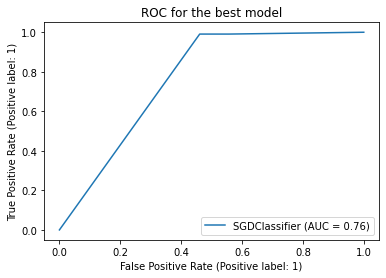

In [189]:
# Let's check the Auc for the best model after hyper parameter tuning
plot_roc_curve(census, x_test, y_test)
plt.title("ROC for the best model")
plt.show()

# Saving the model 

In [190]:
import joblib
joblib.dump(census,"Census Loan Application Status Prediction.pkl")

['Census Loan Application Status Prediction.pkl']